<a href="https://colab.research.google.com/github/hiyoman/ai/blob/main/%EB%9E%9C%EB%8D%A4%ED%8F%AC%EB%A0%88%EC%8A%A4%ED%8A%B8%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D(%EC%88%98%EC%A0%951).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import files
uploaded = files.upload()
import io
import pandas as pd

Saving 도로살얼음 데이터정리2.csv to 도로살얼음 데이터정리2.csv


In [19]:
import numpy as np
df = pd.read_csv(io.StringIO(uploaded['도로살얼음 데이터정리2.csv'].decode('cp949')))

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt


In [42]:
x = df.drop(['마찰계수','YYMMDD','HHMMSS','1시간 뒤 마찰계수','5시간 뒤 마찰계수'], axis = 1)
target = df['5시간 뒤 마찰계수'].values

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136546 entries, 44494 to 103946
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   5시간 평균 대기온도  136546 non-null  float64
 1   대기온도         136546 non-null  float64
 2   대기습도         136546 non-null  float64
 3   기압           136546 non-null  float64
 4   5시간 평균 노면온도  136546 non-null  float64
 5   노면온도         136546 non-null  float64
 6   시간 강수량       136546 non-null  float64
 7   6시간 누적 강수량   136546 non-null  float64
 8   5시간 뒤 마찰계수   136546 non-null  float64
dtypes: float64(9)
memory usage: 10.4 MB


In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size = 0.3)

In [47]:
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.values.reshape(-1,8), y_train.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = regressor.predict(X_test.values.reshape(-1,8))
y_pred

array([0.79861571, 0.81575666, 0.80118035, ..., 0.81999165, 0.81787774,
       0.81997762])

In [49]:
y_test

array([0.7988257, 0.8149362, 0.8011611, ..., 0.8200001, 0.8168064,
       0.8200001])

In [51]:
df1 = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})
df1

,Real Values,Predicted Values
0,0.798826,0.798616
1,0.814936,0.815757
2,0.801161,0.801180
3,0.820000,0.819964
4,0.820000,0.819967
...,...,...
58515,0.820000,0.819987
58516,0.820000,0.820000
58517,0.820000,0.819992
58518,0.816806,0.817878


In [11]:
df

,YYMMDD,HHMMSS,풍향,풍속,대기온도,대기습도,기압,노면온도,시간 강수량,6시간 누적 강수량,마찰계수
0,201113,101600,294.0,1.2,8.1,44.4,982.1,11.18825,0.0,0.0,0.82
1,201113,101700,309.0,0.9,8.1,44.4,982.1,11.27556,0.0,0.0,0.82
2,201113,101800,306.0,1.1,8.2,44.7,982.0,11.37037,0.0,0.0,0.82
3,201113,101900,264.0,1.0,8.3,44.2,982.0,11.47577,0.0,0.0,0.82
4,201113,102000,287.0,1.5,8.4,43.9,982.0,11.57402,0.0,0.0,0.82
...,...,...,...,...,...,...,...,...,...,...,...
195661,210423,112000,284.0,1.4,15.8,25.6,974.8,19.83942,0.0,0.0,0.82
195662,210423,112100,283.0,3.3,15.8,25.4,974.8,19.91520,0.0,0.0,0.82
195663,210423,112200,282.0,2.3,15.9,25.4,974.8,19.91263,0.0,0.0,0.82
195664,210423,112300,223.0,1.4,15.9,25.4,974.8,19.89042,0.0,0.0,0.82


In [52]:
 from sklearn.metrics import mean_squared_error
 mse = np.sqrt(mean_squared_error(y_pred, y_test))
 rmse = np.sqrt(mse)

In [53]:
print('mse : ', mse)
print('rmse : ', rmse)

mse :  0.005683408666252865
rmse :  0.07538838548644523


In [57]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

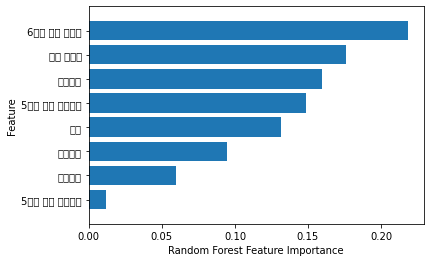

In [58]:
def plot_feature_importance(model):
  n_features = X_train.shape[1] 
  plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
  plt.yticks(np.arange(n_features), X_train.columns)
  plt.xlabel("Random Forest Feature Importance")
  plt.ylabel("Feature")
  plt.ylim(-1, n_features)
    
    
plot_feature_importance(regressor)

In [55]:
answer = pd.DataFrame(test_y[:100].reset_index())
del answer["index"]

plt.plot(answer, label="answer")
plt.plot(forest_reg.predict(test_set_X[:100]), label="predict")
plt.legend()

NameError: ignored

In [56]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error(MAE) : ", mean_absolute_error(y_test,y_pred))
r2 =  r2_score(y_test, y_pred)
print("R Squared (R2) : ",r2)

Mean Absolute Error(MAE) :  0.0006881338781029983
R Squared (R2) :  0.995378666372045


In [59]:
y_pred

array([0.79861571, 0.81575666, 0.80118035, ..., 0.81999165, 0.81787774,
       0.81997762])